<a href="https://colab.research.google.com/github/BrothaaEww/VGG19-on-HAR-dataset/blob/main/HARvgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download meetnagadia/human-action-recognition-har-dataset

 91% 271M/297M [00:01<00:00, 153MB/s]
100% 297M/297M [00:02<00:00, 151MB/s]


In [ ]:
! unzip human-action-recognition-har-dataset.zip


In [ ]:
import os
import glob
import random
import numpy as np
import pandas as pd
# /content/human-action-recognition-har-dataset.zip
# import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

from tqdm import tqdm

from PIL import Image

from keras.utils import to_categorical

import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt
from keras.utils import plot_model


In [ ]:
train_csv = pd.read_csv("/content/Human Action Recognition/Training_set.csv")
test_csv = pd.read_csv("/content/Human Action Recognition/Testing_set.csv")

In [ ]:
train_fol = glob.glob("/content/Human Action Recognition/train/*")
test_fol = glob.glob("/content/Human Action Recognition/test/*")

In [ ]:
train_csv.keys().value_counts()

filename    1
label       1
dtype: int64

In [ ]:
train_csv


,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [ ]:
filename = train_csv['filename']
situation = train_csv['label']

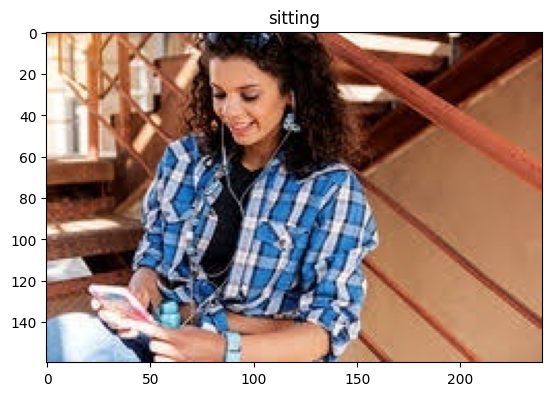

In [ ]:
imgg = "Image_{}.jpg".format(1)
train = "/content/Human Action Recognition/train/"
testImage = img.imread(train + imgg)
plt.imshow(testImage)
plt.title("{}".format(train_csv.loc[train_csv['filename'] == "{}".format(imgg), 'label'].item()))
plt.show()

In [ ]:
img_data = []
img_label = []
length = len(train_fol)
for i in (range(len(train_fol)-1)):
    t = "/content/Human Action Recognition/train/" + filename[i]
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [ ]:
inp_shape = (160, 160,3)

In [ ]:
arr = img_data
arr = np.asarray(arr)
type(arr)

numpy.ndarray

In [ ]:
y_train = to_categorical(np.asarray(train_csv['label'].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG19(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(15, activation='softmax'))

In [ ]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
vgg_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 20294735 (77.42 MB)
Trainable params: 270351 (1.03 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


with early stopping

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience = 3, restore_best_weights = True)
# checkpoint = tf.keras.callbacks.ModelCheckpoint(vgg_model, monitor="val_loss", mode="min", save_best_only=True, verbose=1)

In [ ]:
history = vgg_model.fit(arr, y_train,epochs=40, callbacks=[early_stop])

Epoch 1/40
394/394 [==============================] - 43s 84ms/step - loss: 2.1993 - accuracy: 0.4487
Epoch 2/40
394/394 [==============================] - 32s 82ms/step - loss: 1.2073 - accuracy: 0.6110
Epoch 3/40
394/394 [==============================] - 34s 87ms/step - loss: 0.9417 - accuracy: 0.6912
Epoch 4/40
394/394 [==============================] - 35s 89ms/step - loss: 0.7285 - accuracy: 0.7626
Epoch 5/40
394/394 [==============================] - 34s 87ms/step - loss: 0.5671 - accuracy: 0.8124
Epoch 6/40
394/394 [==============================] - 35s 88ms/step - loss: 0.3966 - accuracy: 0.8690
Epoch 7/40
394/394 [==============================] - 35s 88ms/step - loss: 0.2937 - accuracy: 0.9032
Epoch 8/40
394/394 [==============================] - 34s 87ms/step - loss: 0.2114 - accuracy: 0.9321
Epoch 9/40
394/394 [==============================] - 34s 87ms/step - loss: 0.1614 - accuracy: 0.9502
Epoch 10/40
394/394 [==============================] - 34s 87ms/step - loss: 0.144

Without early stopping

In [ ]:
history = vgg_model.fit(arr,y_train, epochs=40)

In [ ]:
vgg_model.save_weights("model.h5")


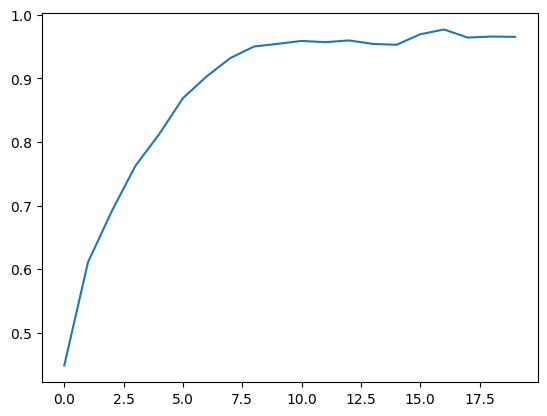

In [ ]:
accurate = history.history['accuracy']
plt.plot(accurate)

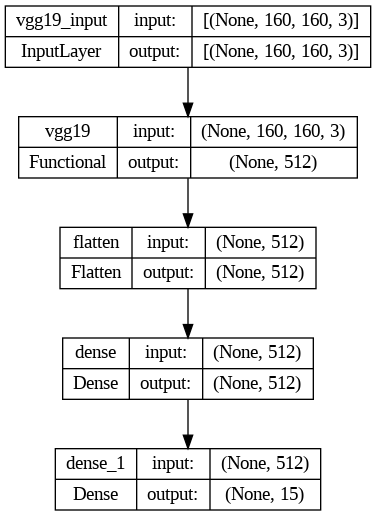

In [ ]:
plot_model(vgg_model, show_shapes = True, show_layer_names = True)

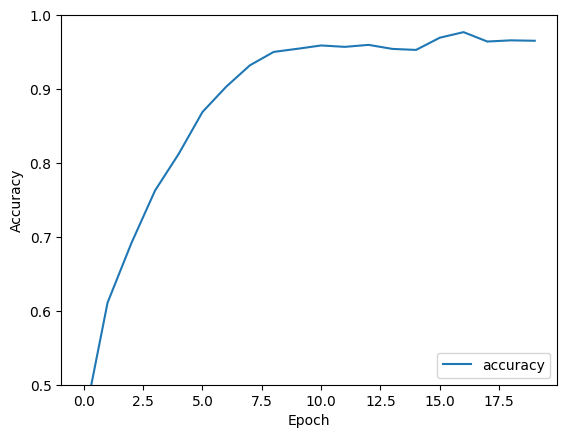

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc = 'lower right')

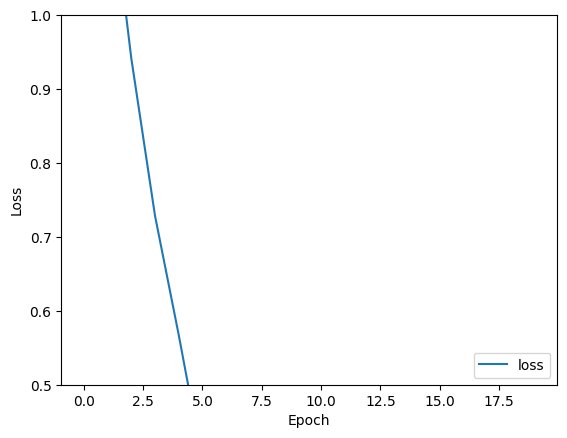

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5,1])
plt.legend(loc = 'lower right')

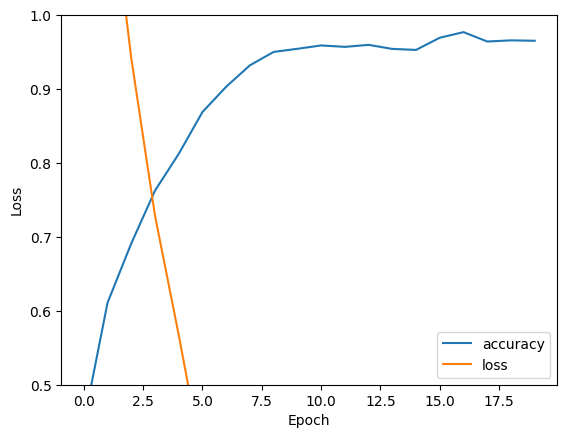

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5,1])

plt.legend(loc = 'lower right')

In [ ]:
situation=["sitting","using_laptop","hugging","sleeping","drinking",
           "clapping","dancing","cycling","calling","laughing"
          ,"eating","fighting","listening_to_music","running","texting"]

In [ ]:
# Function to read images as array

def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((160,160)))
# Function to predict

def test_predict(test_image):
    result = vgg_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)
    return prediction
#     image = img.imread(test_image)
#     plt.imshow(image)
#     plt.title(prediction)

In [ ]:
import os
import pandas as pd

# Define the path to the folder containing the images
folder_path = "/content/Human Action Recognition/test"

# Create an empty dataframe to store the results
predictions_df = pd.DataFrame(columns=["image_name", "prediction"])

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".jpg"): # Adjust the file extension to match your image format
        # Make a prediction for the current image file
        prediction = test_predict(os.path.join(folder_path, file_name))

        # Add the prediction result to the dataframe
        predictions_df = pd.concat([predictions_df, pd.DataFrame({"image_name": [file_name], "prediction": [prediction]})], ignore_index=True)

In [ ]:
predictions_df

,image_name,prediction
0,Image_4693.jpg,None
1,Image_2076.jpg,None
2,Image_4178.jpg,None
3,Image_4233.jpg,None
4,Image_4142.jpg,None
...,...,...
5405,Image_2348.jpg,None
5406,Image_3248.jpg,None
5407,Image_3178.jpg,None
5408,Image_4624.jpg,None


In [ ]:
final=predictions_df
# Define a dictionary that maps each numerical value to its corresponding label
label_map = {
    0: "sitting",
    1: "using laptop",
    2: "hugging",
    3: "sleeping",
    4: "drinking",
    5: "clapping",
    6: "dancing",
    7: "cycling",
    8: "calling",
    9: "laughing",
    10: "eating",
    11: "fighting",
    12: "listening_to_music",
    13: "running",
    14: "texting"
}

# Replace the numerical values in the 'prediction' column with their corresponding labels
final["prediction"] = final["prediction"].map(label_map)

In [ ]:
final


In [ ]:
output_filename = "predictions.csv"

# Save the dataframe as a CSV file
final.to_csv(os.path.join(output_filename), index=False)